<a href="https://colab.research.google.com/github/MulamHema/ml_intern/blob/main/task_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
# Load dataset
data = pd.read_csv('/content/segmentation data.csv')

In [ ]:
data.columns

Index(['ID', 'Sex', 'Marital status', 'Age', 'Education', 'Income',
       'Occupation', 'Settlement size'],
      dtype='object')

In [ ]:
data.head()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,100000001,0,0,67,2,124670,1,2
1,100000002,1,1,22,1,150773,1,2
2,100000003,0,0,49,1,89210,0,0
3,100000004,0,0,45,1,171565,1,1
4,100000005,0,0,53,1,149031,1,1


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   ID               2000 non-null   int64
 1   Sex              2000 non-null   int64
 2   Marital status   2000 non-null   int64
 3   Age              2000 non-null   int64
 4   Education        2000 non-null   int64
 5   Income           2000 non-null   int64
 6   Occupation       2000 non-null   int64
 7   Settlement size  2000 non-null   int64
dtypes: int64(8)
memory usage: 125.1 KB


In [ ]:
data.isnull().sum()

ID                 0
Sex                0
Marital status     0
Age                0
Education          0
Income             0
Occupation         0
Settlement size    0
dtype: int64

In [ ]:
data.describe()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
count,2.000000e+03,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000
mean,1.000010e+08,0.457000,0.496500,35.909000,1.03800,120954.419000,0.810500,0.739000
std,5.774946e+02,0.498272,0.500113,11.719402,0.59978,38108.824679,0.638587,0.812533
min,1.000000e+08,0.000000,0.000000,18.000000,0.00000,35832.000000,0.000000,0.000000
25%,1.000005e+08,0.000000,0.000000,27.000000,1.00000,97663.250000,0.000000,0.000000
50%,1.000010e+08,0.000000,0.000000,33.000000,1.00000,115548.500000,1.000000,1.000000
75%,1.000015e+08,1.000000,1.000000,42.000000,1.00000,138072.250000,1.000000,1.000000
max,1.000020e+08,1.000000,1.000000,76.000000,3.00000,309364.000000,2.000000,2.000000


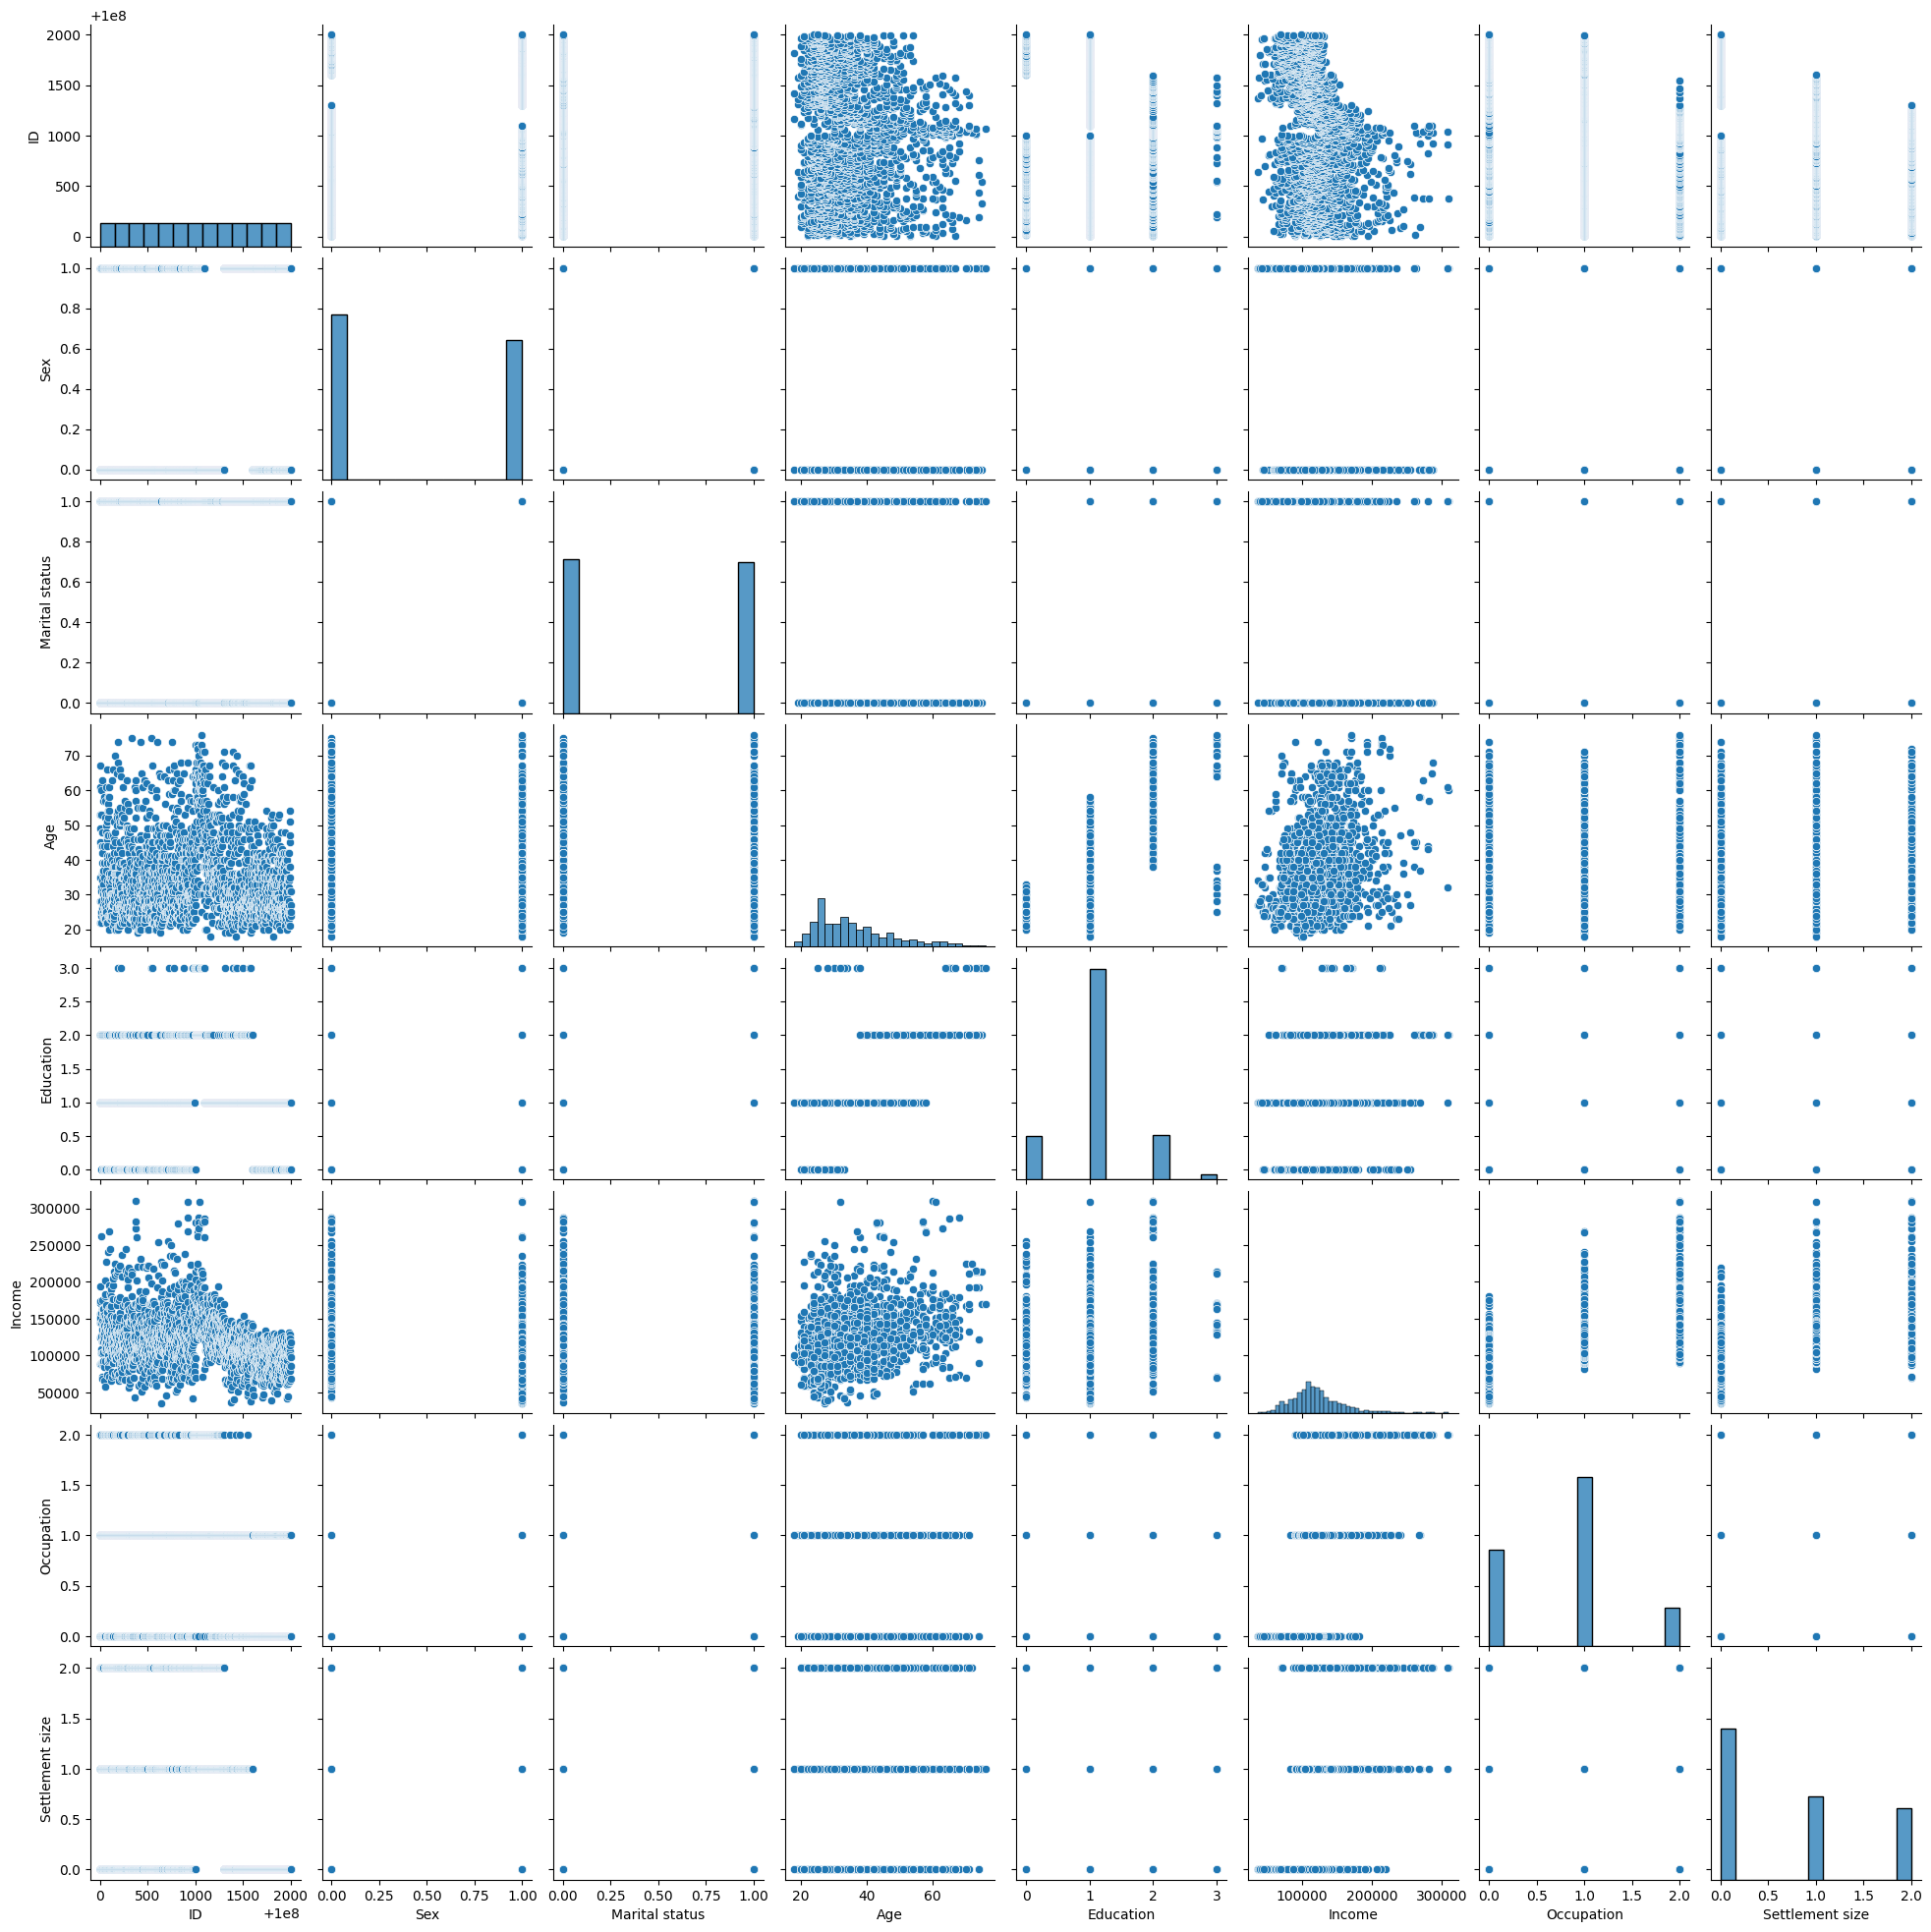

In [ ]:
sns.pairplot(data.copy())

Silhouette Score:  (it is one of the method to find no.of clusters)

In [ ]:
from sklearn.metrics import silhouette_score

silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    silhouette_scores.append(silhouette_score(X, kmeans.labels_))

optimal_k = silhouette_scores.index(max(silhouette_scores)) + 2  # Index starts from 2
print("Optimal number of clusters:", optimal_k)


Optimal number of clusters: 4


In [ ]:
from sklearn.datasets import make_blobs

In [ ]:
X, _ = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)

# Calculate WCSS for different values of K
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)


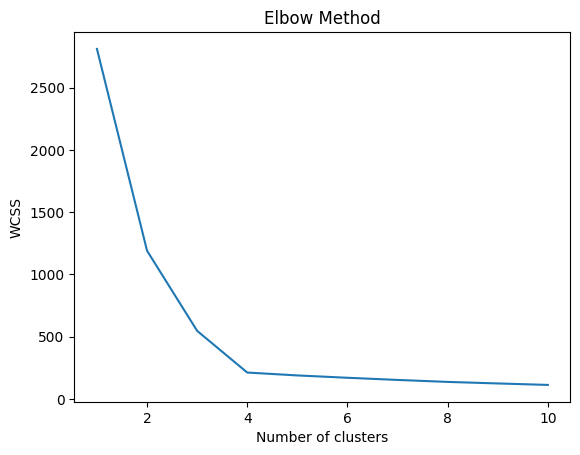

In [ ]:
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

plt.show()

In [ ]:
kmeans = KMeans(n_clusters = 4, init = "k-means++", random_state = 42)
y_kmeans = kmeans.fit_predict(X)

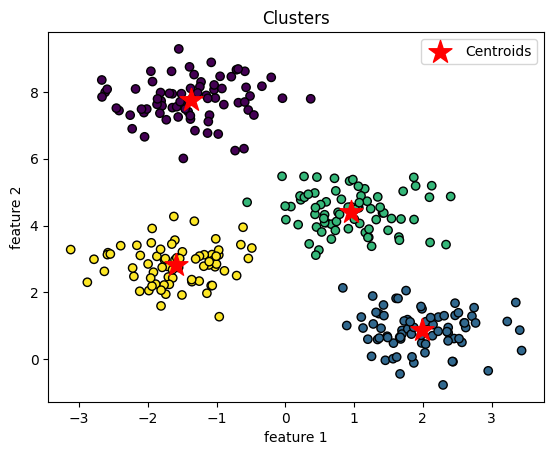

In [ ]:
cluster_labels = kmeans.predict(X)
# Plotting the clusters
plt.scatter(X[:, 0], X[:, 1], c=cluster_labels, cmap='viridis', marker='o', edgecolors='k')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', marker='*', label='Centroids')
plt.title('Clusters')
plt.xlabel('feature 1')
plt.ylabel('feature 2')
plt.legend()
plt.show()


Text(0, 0.5, 'Feature 2')

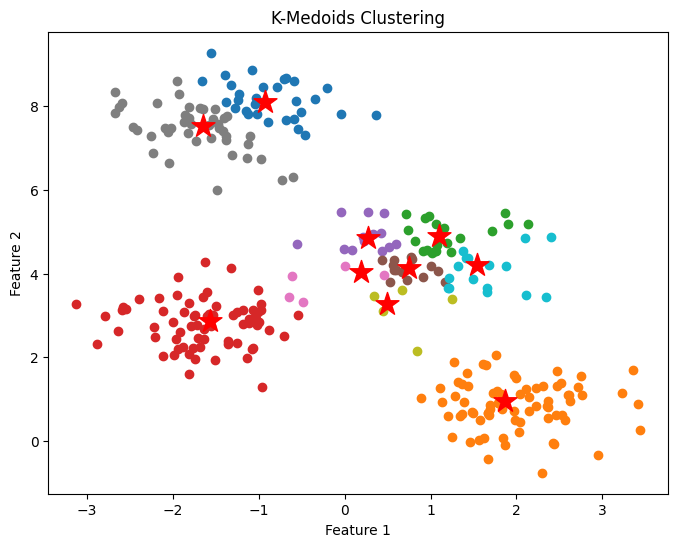

In [ ]:
kmedoids = KMedoids(n_clusters=k, random_state=0)

# Fit the model to the data
kmedoids.fit(X)

# Get cluster labels and cluster medoids
cluster_labels = kmedoids.labels_
cluster_medoids = kmedoids.cluster_centers_

# Plotting the clusters
plt.figure(figsize=(8, 6))
for i in range(k):
    cluster_points = X[cluster_labels == i]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Cluster {i+1}')
plt.scatter(cluster_medoids[:, 0], cluster_medoids[:, 1], marker='*', c='red', s=300, label='Medoids')
plt.title('K-Medoids Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

In [ ]:
import numpy as np

def calculate_distance(point1, point2):
    # Assuming point1 and point2 are numpy arrays representing the coordinates of the medoids
    # You can use any distance metric here (e.g., Euclidean distance)
    return np.linalg.norm(point1 - point2)  # Euclidean distance

# Assuming medoids is a numpy array containing the coordinates of the medoids
medoids = np.array([[1, 2], [3, 4], [5, 6]])

# Calculate distances between each pair of medoids
num_medoids = len(medoids)
distances = np.zeros((num_medoids, num_medoids))
for i in range(num_medoids):
    for j in range(i + 1, num_medoids):
        distance_ij = calculate_distance(medoids[i], medoids[j])
        distances[i, j] = distance_ij
        distances[j, i] = distance_ij  # Since distance is symmetric

print("Distances between medoids:")
print(distances)

Distances between medoids:
[[0.         2.82842712 5.65685425]
 [2.82842712 0.         2.82842712]
 [5.65685425 2.82842712 0.        ]]


In [ ]:
pip install scikit-learn-extra


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 12.8 MB/s eta 0:00:00


In [ ]:
from sklearn_extra.cluster import KMedoids

# Using PAM (KMedoids) with k=3
pam = KMedoids(n_clusters=3, random_state=0)
pam.fit(X)

pam_labels = pam.labels_
pam_medoids = pam.cluster_centers_


In [ ]:
from sklearn_extra.cluster import KMedoids
from sklearn.utils import resample

# Using CLARA with k=3
num_samples = 5  # Number of samples
sample_size = 50  # Size of each sample
clara_medoids = []

for _ in range(num_samples):
    sample_indices = np.random.choice(X.shape[0], sample_size, replace=False)
    sample = X[sample_indices]

    pam = KMedoids(n_clusters=3, random_state=0)
    pam.fit(sample)
    clara_medoids.append(pam.cluster_centers_)

# Aggregate results from multiple samples
clara_medoids = np.mean(clara_medoids, axis=0)


In [ ]:
from sklearn_extra.cluster import Clarans

clarans = clarans(n_clusters=4, random_state=0)
clarans.fit(X)

clarans_labels = clarans.labels_
clarans_medoids = clarans.cluster_centers_

ImportError: cannot import name 'Clarans' from 'sklearn_extra.cluster' (/usr/local/lib/python3.10/dist-packages/sklearn_extra/cluster/__init__.py)

NameError: name 'clarans_labels' is not defined

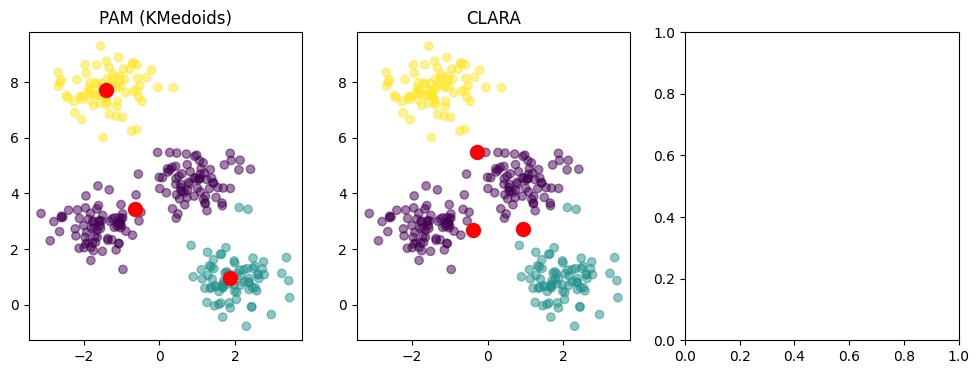

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))

# PAM
plt.subplot(131)
plt.scatter(X[:, 0], X[:, 1], c=pam_labels, cmap='viridis', alpha=0.5)
plt.scatter(pam_medoids[:, 0], pam_medoids[:, 1], marker='o', c='red', s=100, label='PAM Medoids')
plt.title('PAM (KMedoids)')

# CLARA
plt.subplot(132)
plt.scatter(X[:, 0], X[:, 1], c=pam_labels, cmap='viridis', alpha=0.5)
plt.scatter(clara_medoids[:, 0], clara_medoids[:, 1], marker='o', c='red', s=100, label='CLARA Medoids')
plt.title('CLARA')

# CLARANS
plt.subplot(133)
plt.scatter(X[:, 0], X[:, 1], c=clarans_labels, cmap='viridis', alpha=0.5)
plt.scatter(clarans_medoids[:, 0], clarans_medoids[:, 1], marker='o', c='red', s=100, label='CLARANS Medoids')
plt.title('CLARANS')

plt.tight_layout()
plt.show()
